## Library yang digunakan

- scipy.io.wavfile = digunakan untuk read wave (.wav) file
- matplotlib.pyplot = digunakan untuk plot data audio dan membuat histogram
- IPython.display = digunakan untuk play audio
- IPython.core.display = digunakan untuk display play audio
- math = digunakan untuk logaritma 

In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import IPython.display as ipd
from IPython.core.display import display
import math

## Function read Audio
    - params:
        - destination: str
    - return:
        - tuple(sampling_frequency: int, audio: list(int))

In [ ]:
def read_audio(destination: str):
    '''
    - params:
        - destination: str
    - return:
        - tuple(sampling_frequency: int, audio: list(int))
    '''
    sampling_frequency, input_data = read(destination)
    audio = input_data[:,0]
    return sampling_frequency, audio

## Function Plot Audio
    - params:
        - audio: list(float),
        - title: str = '',
        - xlabel: str = '',
        - ylabel: str = ''
    - return:
        - None

In [ ]:
def plot_audio(audio, title = '', xlabel = '', ylabel = ''):
    '''
    - params:
        - audio: list(float),
        - title: str = '',
        - xlabel: str = '',
        - ylabel: str = ''
    - return:
        - None
    '''
    plt.plot(audio)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)    
    plt.show()

Function Play Audio

    - params:
        - sr(sample rate): int,
        - data: list(float)
    - return:
        - None

In [ ]:
def play_audio(sr, data):
    '''
    - params:
        - sr(sample rate): int,
        - data: list(float)
    - return:
        - None
    '''
    display(ipd.Audio(data, rate=sr))

## Function Data Normalization

    - params:
        - data: list(int)
    - return:
        - data_normal: list(float)

In [ ]:
def data_normalization(data):
    '''
    - params:
        - data: list(int)
    - return:
        - data_normal: list(float)
    '''
    divider = abs(max(data))
    if divider < abs(min(data)):
        divider = abs(min(data))
    data_normal = []
    for d in data:
        if d == 0:
            data_normal.append(d)
        else:
            data_normal.append(d/divider)
    return data_normal

## Function rectangle windowing non overlaping

    - params:
        - data -> list(float),
        - sample_rate(hz): int,
        - time(ms): int
    - return:
        - samples(windowing): list(list(float))

In [ ]:
def rectangle_windowing_audio(data, sample_rate, time):
    '''
    - params:
        - data -> list(float),
        - sample_rate(hz): int,
        - time(ms): int
    - return:
        - samples(windowing): list(list(float))
    '''
    n_frame = int((time/1000)*sample_rate)
    n_data = len(data)
    curr_slice = 0
    samples = []
    while curr_slice + n_frame < n_data:
        slicing = data[curr_slice:curr_slice+n_frame]
        samples.append(slicing)
        curr_slice += n_frame
    slicing = data[curr_slice:n_data]
    samples.append(slicing)
    return samples

## Function Audio Energy
    - params:
        - data_windows: list(list(float))
    - return:
        - audio_energies: list(float)

In [ ]:
def audio_energy(data_windows):
    '''
    - params:
        - data_windows: list(list(float))
    - return:
        - audio_energies: list(float)
    '''
    audio_energies = []
    for window in data_windows:
        sum_square = 0
        # window_length = len(window)
        for sample in window:
            sum_square += abs(sample)**2
        # audio_energy = sum_square/window_length
        # audio_energies.append(audio_energy)
        audio_energies.append(sum_square)
    return audio_energies

## Function Zero Crossing Rate
    - params:
        - data_windows: list(list(float))
    - return:
        - zcrs: list(float)

## Function sign
    - params:
        - x: float
    - return:
        - int

In [ ]:
def sign(x):
    '''
    - params:
        - x: float
    - return:
        - int
    '''
    if x >= 0:
        return 1
    else:
        return -1

def zero_crossing_rate(data_windows):
    '''
    - params:
        - data_windows: list(list(float))
    - return:
        - zcrs: list(float)
    '''
    zcrs = []
    for window in data_windows:
        window_length = len(window)
        sigma = 0
        for index_sample in range(1, len(window)):
            sgn_x_n = sign(window[index_sample])
            sgn_x_n_b = sign(window[index_sample-1])
            sigma += abs(sgn_x_n - sgn_x_n_b)
        zcr = sigma/(window_length*2)
        zcrs.append(zcr)
    return zcrs

## Function Entropy of Energy

    - params:
        - data_windows: list(list(float)),
        - sample_rate(hz): int,
        - time(ms): int
    - return:
        - entropy_energies: list(float)

In [ ]:
def entropy_energy(data_windows, sample_rate, time):
    '''
    - params:
        - data_windows: list(list(float)),
        - sample_rate(hz): int,
        - time(ms): int
    - return:
        - entropy_energies: list(float)
    '''
    entropy_energies = []
    for window in data_windows:
        window_energy = audio_energy([window])[0]
        sub_window = rectangle_windowing_audio(window, sample_rate, time)
        sub_window_audio_energies = audio_energy(sub_window)
        sigma = 0
        if window_energy < 0:
            print(f'window energy {window_energy}')
        for sub_window_audio_energy in sub_window_audio_energies:
            if sub_window_audio_energy < 0:
                print(f'sub window {sub_window_audio_energy}')
            e_sub = sub_window_audio_energy/window_energy
            sigma += e_sub*math.log2(e_sub)
            if math.log2(e_sub) > 0:
                print(f'log {math.log2(e_sub)} e_sub {e_sub}')
        entropy_energies.append(-sigma)
    return entropy_energies

## Function Histogram
    - params:
        - data: list(float),
        - binwidth: int = 1,
        - title: str = 'Histogram',
        - xlabel: str = 'amplitude',
        - ylabel: str = 'frekuensi',
        - x_min: float = if None : data(minimum),
        - x_max: float = if None : data(maximum)
    - return:
        - None

In [ ]:
def histogram(data, binwidth = 1, title = 'Histogram', xlabel = 'amplitude', ylabel = 'frekuensi', x_min = None, x_max = None):
    '''
    - params:
        - data: list(float),
        - binwidth: int = 1,
        - title: str = 'Histogram',
        - xlabel: str = 'amplitude',
        - ylabel: str = 'frekuensi',
        - x_min: float = if None : data(minimum),
        - x_max: float = if None : data(maximum)
    - return:
        - None
    '''
    if x_min == None:
        x_min = min(data)
    if x_max == None:
        x_max = max(data)
    bin = np.arange(x_min-(0.5*binwidth), x_max + binwidth, binwidth)
    plt.hist(data, bins=bin, histtype='stepfilled')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Information Audio

- Audio di download dari [file_example_WAV_1MG.wav](https://file-examples.com/index.php/sample-audio-files/sample-wav-download/)
- Size: 1 MB
- Sample Rate: 8000 hz
- Bit rate: 256 kbps
- Data length: 268237
- Duration: 268237/8000 = 33,529625

In [ ]:
def main():
    # Read audio data
    # https://file-examples.com/index.php/sample-audio-files/sample-wav-download/
    source = '/content/drive/Shareddrives/Pengenalan Pola/file_example_WAV_1MG.wav'
    sampling_frequency, data_audio = read_audio(source)
    # print(f'panjang {len(data_audio)}')
    # print(f'sample rate {sampling_frequency}')
    
    # data normalization
    data_audio_normal = data_normalization(data_audio)
    # print(f'total data {len(data_audio_normal)}')

    # Draw Audio data
    print(f'\n\nVisualization Data Audio')
    plot_audio(data_audio_normal, title= 'Plot Audio', xlabel= 'Time', ylabel= 'Amplitudo')

    # Play audio data
    print(f'\n\nPlay audio data')
    play_audio(sampling_frequency, data_audio_normal)
    
    # Windowing rectangle non overloping
    # Waktu per window 40 ms
    windows = rectangle_windowing_audio(data_audio_normal, sampling_frequency, 40)
    # print(f'total window {len(windows)}')
    # print(f'panjang window {len(windows[0])}')

    # Audio Energy
    data_audio_energy = audio_energy(windows)
    print(f'\n\nHistogram Audio Energy')
    histogram(data_audio_energy, 0.1, title='Histogram Audio Energy')
    print(f'\n\nPlot Audio Energy')
    plot_audio(data_audio_energy, title= 'Plot Audio Energy', xlabel= 'Time per window', ylabel= 'Energy')

    # Zero Crossing Rate
    data_zero_crossing_rate = zero_crossing_rate(windows)
    print(f'\n\nHistogram Zero Crossing Rate')
    histogram(data_zero_crossing_rate, 0.01, title='Histogram Zero Crossing Rate')

    # Entropy of Energy
    # Waktu sub window/frame 10 ms
    entropy_energies = entropy_energy(windows, sampling_frequency, 10)
    print(f'\n\nHistogram Entropy of Energy')
    histogram(entropy_energies, 0.01, title='Histogram Entropy of Energy')
    print(f'\n\nPlot Entropy of Energy')
    plot_audio(entropy_energies, title= 'Plot Entropy of Energy', xlabel= 'Time per window', ylabel= 'Entropy of Energy')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  




Visualization Data Audio


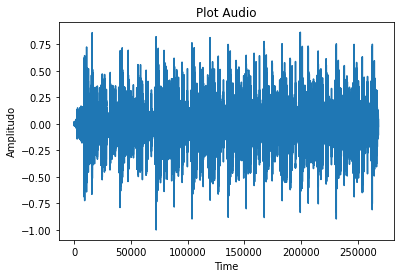



Play audio data




Histogram Audio Energy


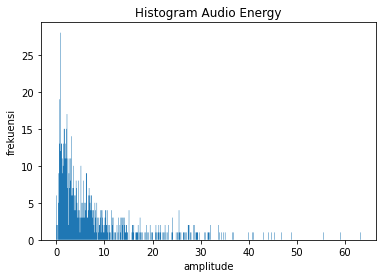



Plot Audio Energy


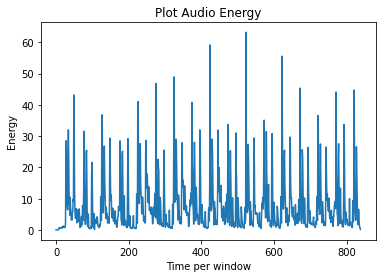



Histogram Zero Crossing Rate


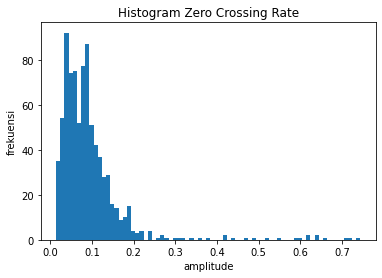



Histogram Entropy of Energy


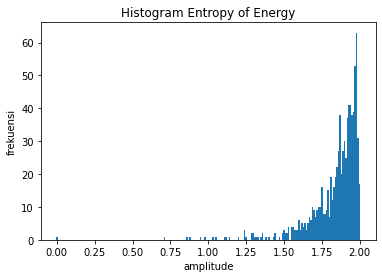



Plot Entropy of Energy


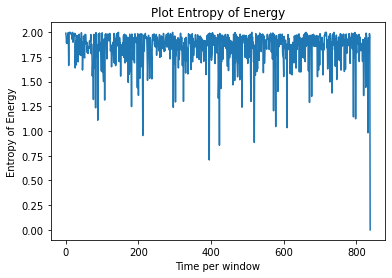

In [ ]:
if __name__ == '__main__':
    main()